In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In the above dataset there are many 0 values but they have no meaning this does not include the outcome column

#### Data Imputation of 0's in every feature
#### size of data

In [7]:
df.shape

(768, 9)

- As the target column is available in the dataset, supervised machine learning algorithm

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


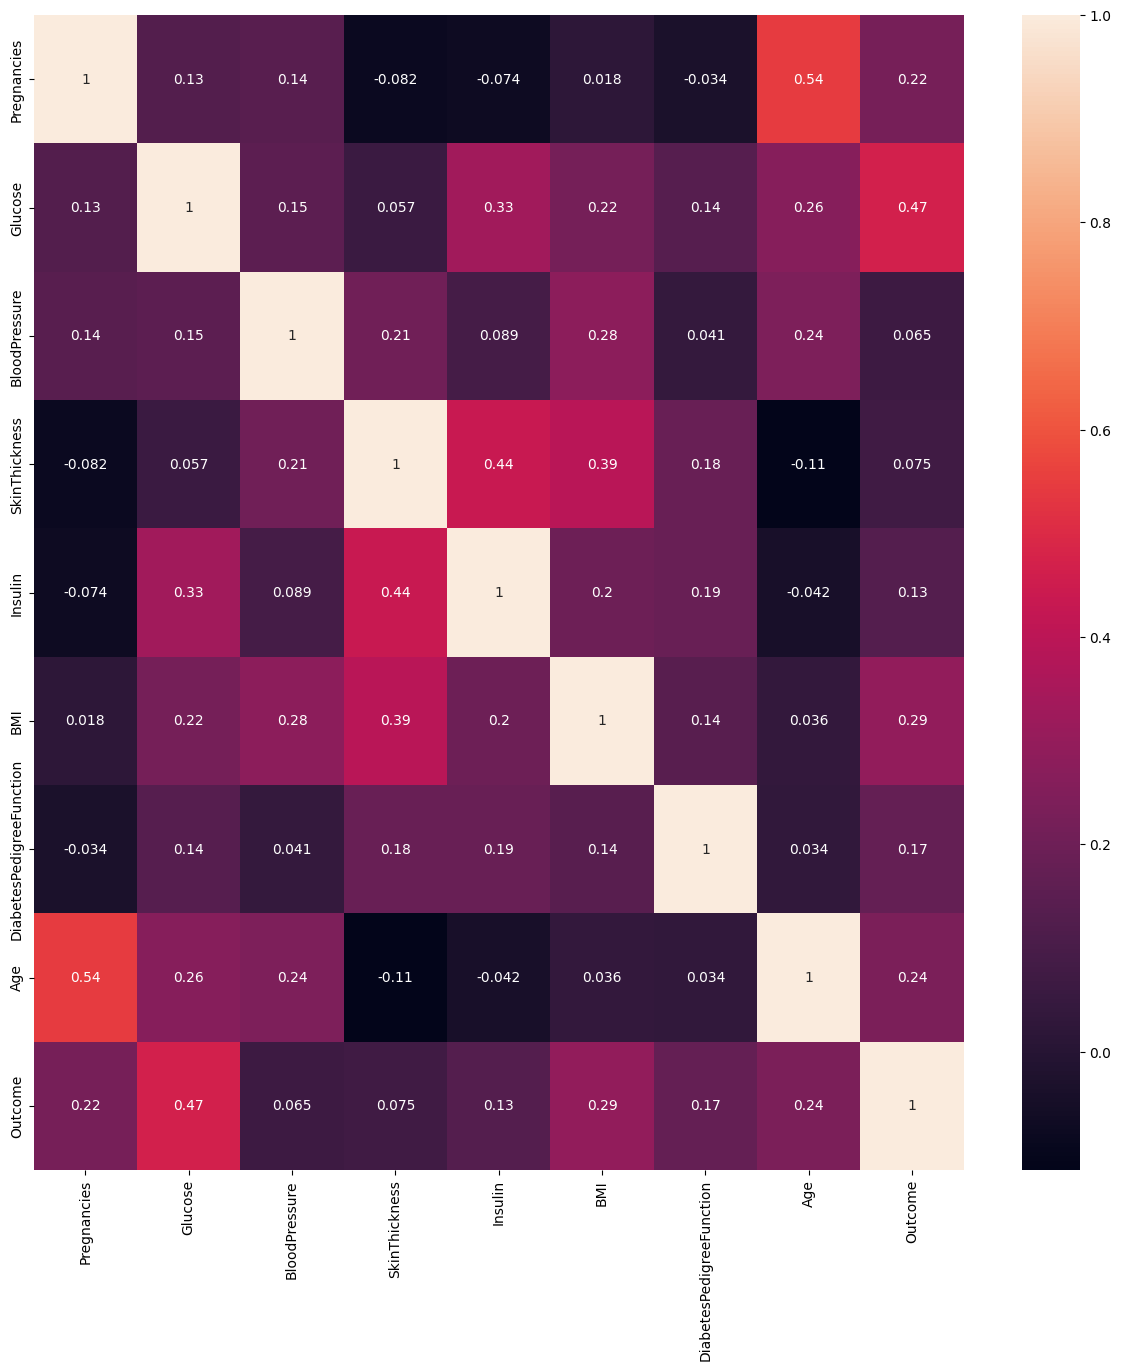

In [9]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the above code the value of count for resp value is = to the no. of rows that we get on doing df.shape
thus you can say that there are no null values

#### Data Imputation 

whenever outliers exists mean is not a great measure

median is more robust to outliers

if the numeric data is symmetric(no outliers) the mean can be used for imputation

if the numeric data is non symmetric(outliers exsist) then the graph will be left or right skewed the median is used for imputation


for categorical data we use mode for imputation

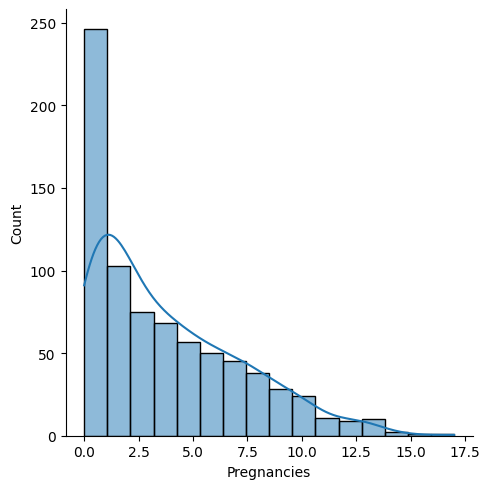

In [11]:
sns.displot(df['Pregnancies'],kde=True)

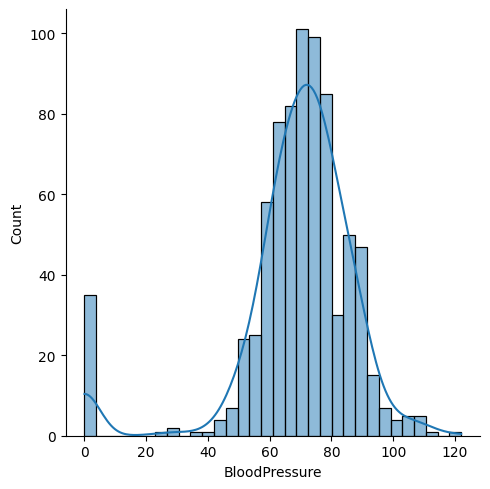

In [12]:
sns.displot(df['BloodPressure'],kde = True)

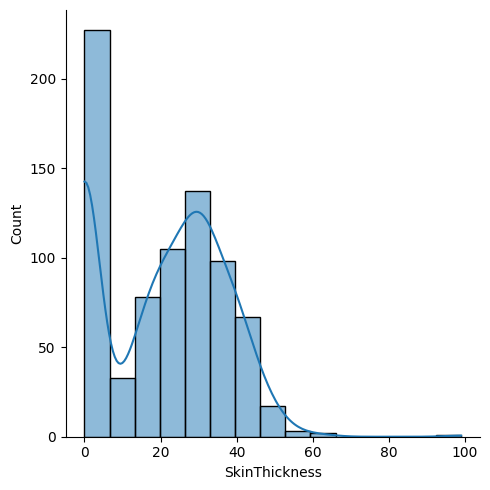

In [13]:
sns.displot(df['SkinThickness'],kde = True)

In [14]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())

In [15]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,0,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,0,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,0,30.5,0.0,0.232,54,1


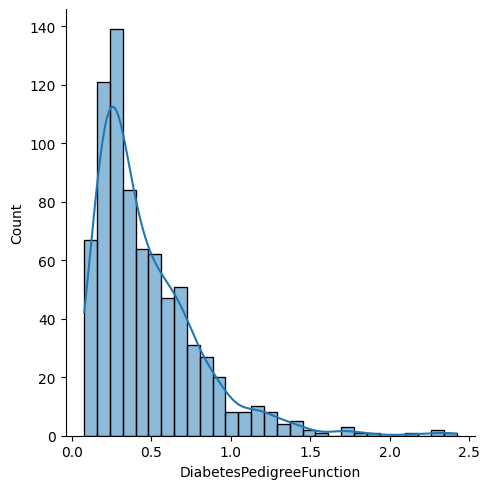

In [16]:
sns.displot(df['DiabetesPedigreeFunction'],kde = True)

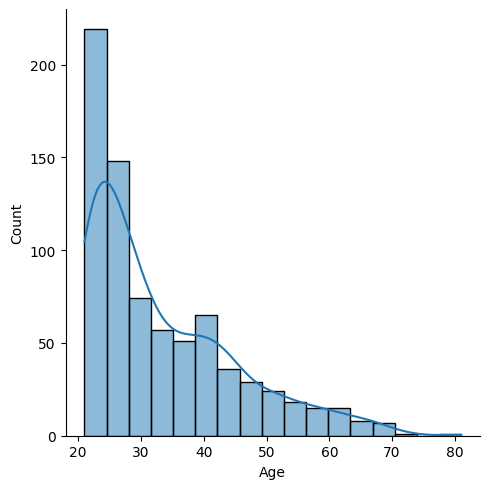

In [17]:
sns.displot(df['Age'],kde = True)

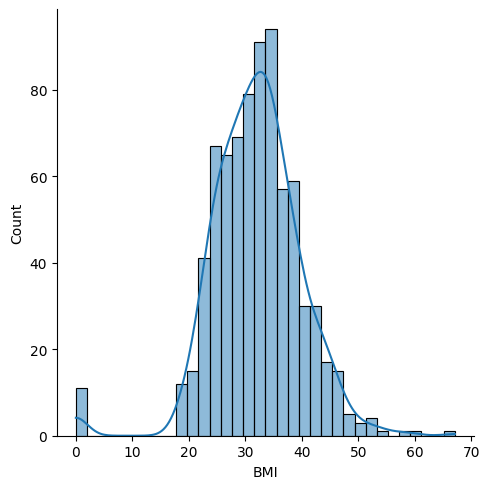

In [18]:
sns.displot(df['BMI'],kde = True)

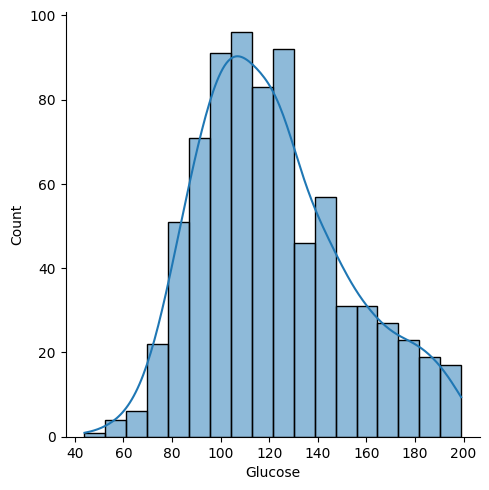

In [73]:
sns.displot(df['Glucose'],kde = True)

In [19]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0,df['Age'].median())



In [20]:
# df.drop('BMI\t',axis=1,inplace=True)


In [21]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,0,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


#### Outlier detection 

In [22]:
# X-> input features, y-> target feature
# x will contain all columns except 'Outcome', which are your input features.
x = df.drop(columns='Outcome',axis = 1)
y = df['Outcome']


Outlier Detection using boxplot

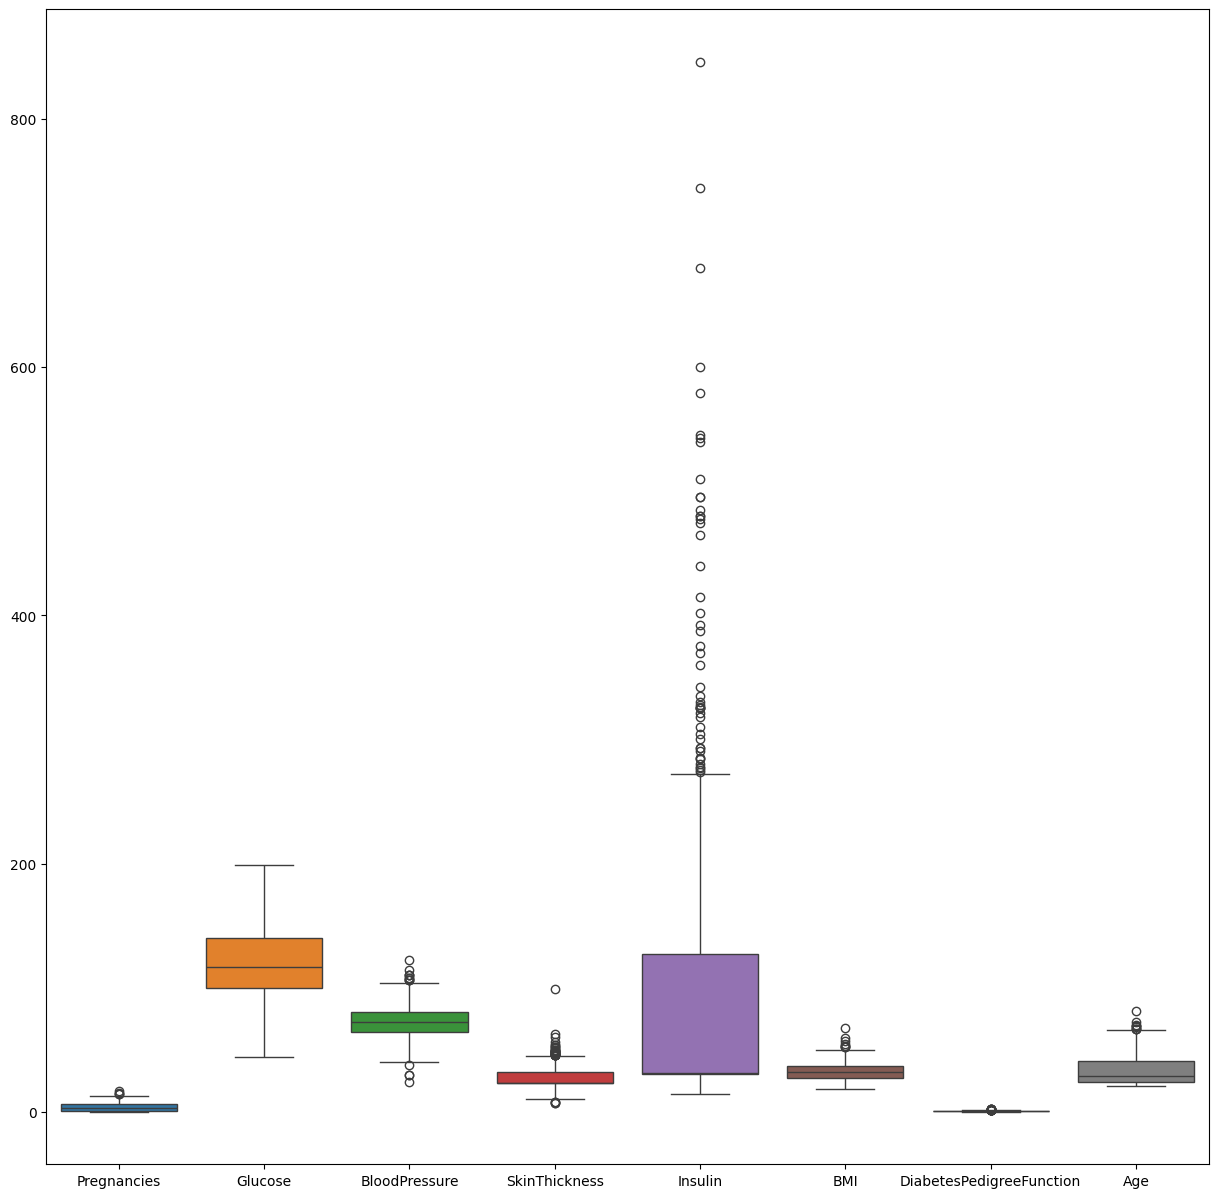

In [23]:
fig,ax =  plt.subplots(figsize=(15,15))
sns.boxplot(data = x,ax =ax)
plt.savefig('boxPlot.jpg')

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (x[col]>=lower_bound) & (x[col]<=upper_bound)

In [26]:
x_outlier_detection = x[mask]
y_outlier_detection = y[mask]

In [27]:
x_outlier_detection

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [28]:
x_outlier_detection.shape

(759, 8)

In [29]:
y_outlier_detection.shape

(759,)

In [30]:
x_outlier_detection

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


#### Normalizing the data so that mean = 0 and standard deviation = 1

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_outlier_detection)


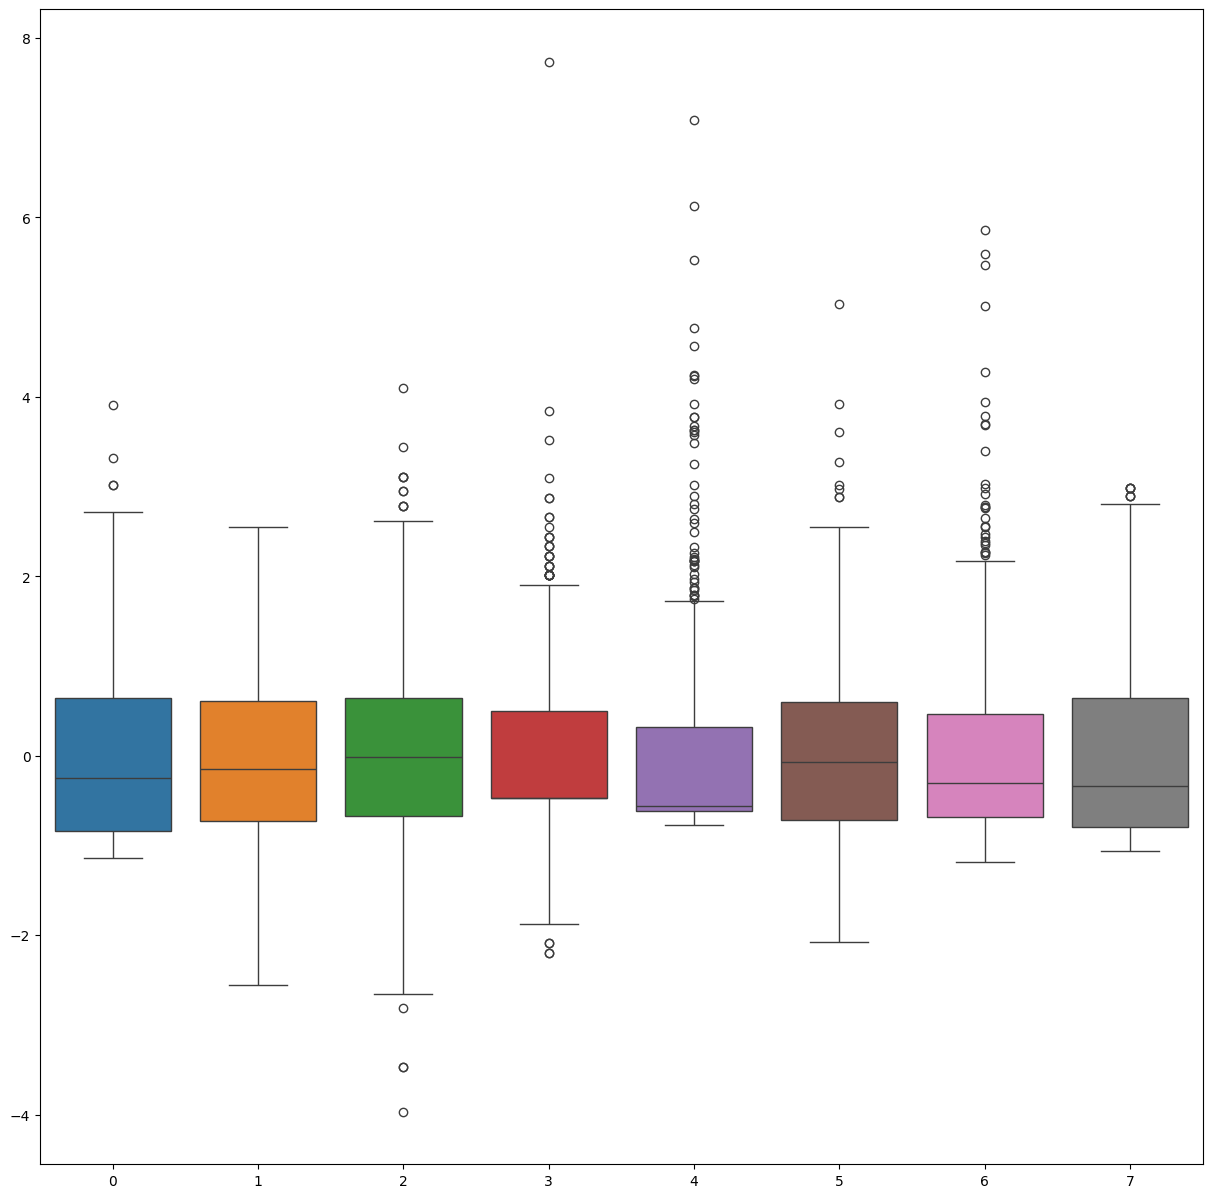

In [32]:
fig,ax =  plt.subplots(figsize=(15,15))
sns.boxplot(data = x_scaled,ax =ax)
plt.savefig('boxPlot.jpg')

In [33]:
x_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [36]:
x_scaled = pd.DataFrame(x_scaled,columns=cols)

# x_scaled.describe()
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.870083,-0.016984,0.822990,-0.612669,0.160901,0.468793,1.548281
1,-0.839847,-1.206570,-0.510935,0.175013,-0.612669,-0.858162,-0.361774,-0.162527
2,1.236518,2.023779,-0.675585,-0.472963,-0.612669,-1.338578,0.604211,-0.072485
3,-0.839847,-1.074719,-0.510935,-0.472963,-0.012978,-0.639792,-0.915485,-1.062953
4,-1.136471,0.507493,-2.651386,0.822990,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.679166,0.312316,2.226939,0.799202,0.058994,-0.903448,2.718835
755,-0.543224,0.013052,-0.181634,-0.040979,-0.612669,0.626758,-0.394876,-0.522698
756,0.346647,-0.019911,-0.016984,-0.472963,0.157014,-0.916395,-0.680760,-0.252570
757,-0.839847,0.144903,-1.004885,-0.472963,-0.612669,-0.348631,-0.367793,1.278154


In [37]:
y.value_counts()
## the above code helps use to detect the imbalance in the dataset

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
x_scaled = pd.DataFrame(x_scaled,columns=cols)
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.870083,-0.016984,0.822990,-0.612669,0.160901,0.468793,1.548281
1,-0.839847,-1.206570,-0.510935,0.175013,-0.612669,-0.858162,-0.361774,-0.162527
2,1.236518,2.023779,-0.675585,-0.472963,-0.612669,-1.338578,0.604211,-0.072485
3,-0.839847,-1.074719,-0.510935,-0.472963,-0.012978,-0.639792,-0.915485,-1.062953
4,-1.136471,0.507493,-2.651386,0.822990,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.679166,0.312316,2.226939,0.799202,0.058994,-0.903448,2.718835
755,-0.543224,0.013052,-0.181634,-0.040979,-0.612669,0.626758,-0.394876,-0.522698
756,0.346647,-0.019911,-0.016984,-0.472963,0.157014,-0.916395,-0.680760,-0.252570
757,-0.839847,0.144903,-1.004885,-0.472963,-0.612669,-0.348631,-0.367793,1.278154


In [39]:
x_scaled.shape


(759, 8)

In [40]:
x_scaled['Insulin']

0     -0.612669
1     -0.612669
2     -0.612669
3     -0.012978
4      0.685875
         ...   
754    0.799202
755   -0.612669
756    0.157014
757   -0.612669
758   -0.612669
Name: Insulin, Length: 759, dtype: float64

#### Removing outliers using Quantile Approach

In [41]:
x_scaled.reset_index(drop = True, inplace = True)
y_outlier_detection.reset_index(drop = True,inplace = True)

In [ ]:
# Rename columns of x_scaled to match the original column names
# x_scaled.columns = x_outlier_detection.columns

# Filter based on the 'Insulin' column  ** the below code is for removing outliers using Quantile 
# q = x_scaled['Insulin'].quantile(.95)
# dataNew = x_scaled[x_scaled['Insulin'] < q]

# 🔴 Problem with the above code for removing outliers: Now, x_scaled has fewer rows than y_outlier_detection, 
# so the feature-label mapping is broken. This can cause issues in machine learning models where every 
# input (x_scaled) must have a corresponding output (y_outlier_detection).

q = x_scaled['Insulin'].quantile(.95)
mask = x_scaled['Insulin'] < q

dataNew = x_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

# ✅ Why the  code  just above this text is Better?
# The same mask (mask) is applied to both x_scaled and y_outlier_detection.
# This ensures that for every row removed from x_scaled, the corresponding row in y_outlier_detection is also removed.
# Now, the number of rows in dataNew and y_outlier_detection remains the same, keeping input-output samples aligned

In [43]:
mask

0      True
1      True
2      True
3      True
4      True
       ... 
754    True
755    True
756    True
757    True
758    True
Name: Insulin, Length: 759, dtype: bool

In [44]:
dataNew

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.870083,-0.016984,0.822990,-0.612669,0.160901,0.468793,1.548281
1,-0.839847,-1.206570,-0.510935,0.175013,-0.612669,-0.858162,-0.361774,-0.162527
2,1.236518,2.023779,-0.675585,-0.472963,-0.612669,-1.338578,0.604211,-0.072485
3,-0.839847,-1.074719,-0.510935,-0.472963,-0.012978,-0.639792,-0.915485,-1.062953
4,-1.136471,0.507493,-2.651386,0.822990,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.679166,0.312316,2.226939,0.799202,0.058994,-0.903448,2.718835
755,-0.543224,0.013052,-0.181634,-0.040979,-0.612669,0.626758,-0.394876,-0.522698
756,0.346647,-0.019911,-0.016984,-0.472963,0.157014,-0.916395,-0.680760,-0.252570
757,-0.839847,0.144903,-1.004885,-0.472963,-0.612669,-0.348631,-0.367793,1.278154


In [45]:
dataNew.shape

(721, 8)

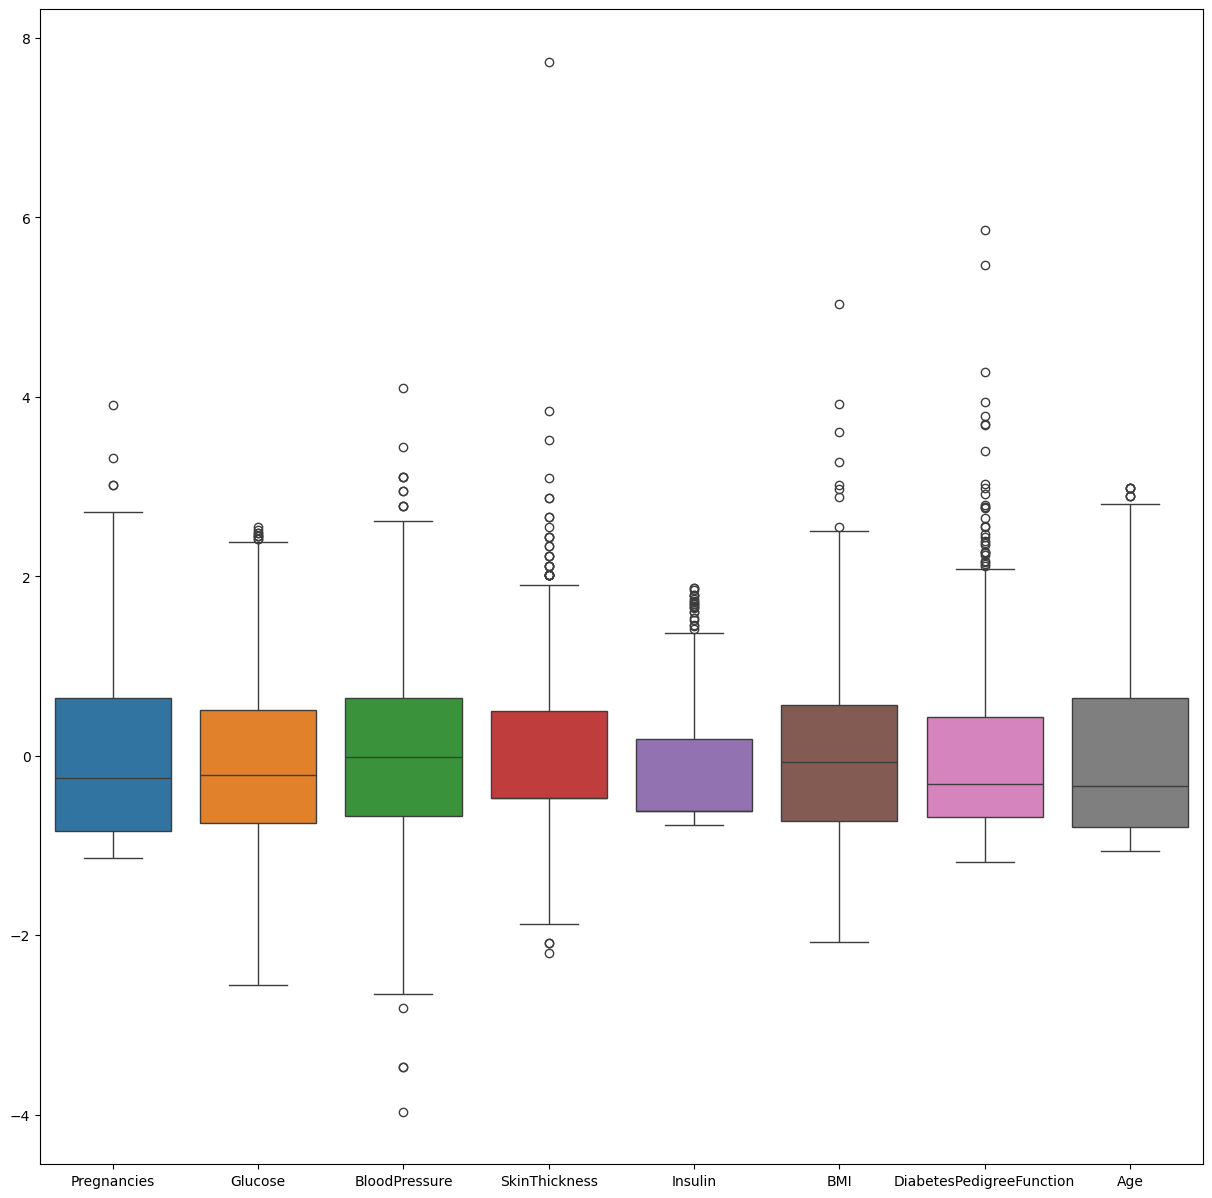

In [46]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = dataNew,ax = ax)
plt.savefig('boxPlot.jpg')

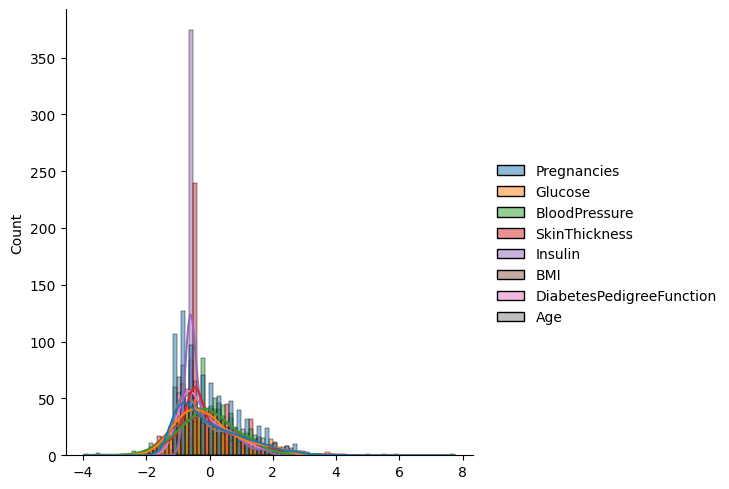

In [47]:
sns.displot(data = dataNew,kde = True)

#### model training

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataNew,y_outlier_detection,test_size = 0.33,random_state = 42)
# 33% of the data is the testing set , random state - when you run the same code on different machine then the test dataset will have different value so inorder to generate same dataset every time you run the code we use the random_state and set it to a random number

In [49]:
x_train.shape

(483, 8)

In [50]:
x_test.shape

(238, 8)

Below code represents a condition of data imbalance to solve this we use two techniques that is of undersampling and oversampling
Oversampling - the class that has less samples for that class we will take multiple random samples to increase its count majority class
undersampling - we reduce the number of counts in class that has more counts and makes it count equal to minority class
There is one more technique that is part of Oversampling --> SMOTE technique -- Synthetic data and try to increase the number of sample to the majority class 

https://imbalanced-learn.org/stable/ -> this is the docs for managing data imbalance

In [51]:
y_train.value_counts()

Outcome
0    318
1    165
Name: count, dtype: int64

In [52]:
# pip install imbalanced-learn


#### SMOTE Technique

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

# check resampled class ditribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In [54]:
y_train_resampled

0      0
1      1
2      0
3      0
4      0
      ..
631    1
632    1
633    1
634    1
635    1
Name: Outcome, Length: 636, dtype: int64

#### model training

In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(x_train_resampled,y_train_resampled)

# What Logistic Regression Does:

# It models the probability of an input belonging to the positive class (1) using a sigmoid function:

LogisticRegression()

In [56]:
y_predictions = classification.predict(x_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.7563025210084033

In [58]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic','Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.86      0.76      0.81       159
    Diabetic       0.61      0.75      0.67        79

    accuracy                           0.76       238
   macro avg       0.73      0.75      0.74       238
weighted avg       0.78      0.76      0.76       238



#### Understanding the Metrics(above generated classification report):

`Precision-	Out of all predicted positives, how many were actually correct?`

`Recall-	Out of all actual positives, how many did the model correctly predict?`

`F1-score-	A balance between precision and recall (useful when classes are imbalanced).`

`Support-	The number of actual samples in each class.`

Breaking Down the Report:
### 1. Class-Level Metrics
Non-Diabetic (Majority Class)

Precision: 0.86 → When the model says "Non-Diabetic," it is 86% correct.

Recall: 0.76 → Out of all actual Non-Diabetic cases, the model correctly identified 76%.

F1-score: 0.81 → A balance of precision and recall.

Diabetic (Minority Class)

Precision: 0.61 → When the model says "Diabetic," it is 61% correct.

Recall: 0.75 → The model caught 75% of actual Diabetic cases.

F1-score: 0.67 → A balance of precision and recall.


### 2. Overall Model Performance
- Accuracy: 0.76
→ The model is 76% correct overall.

#### Macro Average: (Average of Precision, Recall, and F1-score for both classes)

- Precision: 0.73

- Recall: 0.75

- F1-score: 0.74

- Good for comparing class balance.

#### Weighted Average: (Takes into account the number of instances per class)

- Precision: 0.78

- Recall: 0.76

-F1-score: 0.76

More reliable when the dataset is imbalanced.

#### Storing the model


In [59]:
import pickle
pickle.dump(classification,open("classification_model.pkl","wb"))

#### Using the saved model

In [60]:
classification_model = pickle.load(open("classification_model.pkl","rb"))
classification_model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()

In [62]:
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [63]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Gaussian Naive Bayes model
model_gaussian_bayes = GaussianNB()
model_gaussian_bayes.fit(x_train, y_train)

# Make predictions
y_predict_gaussian_naive_bayes = model_gaussian_bayes.predict(x_test)
print(y_predict_gaussian_naive_bayes)

[0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [64]:
print('confusion_matrix')
print(confusion_matrix(y_test,y_predict_gaussian_naive_bayes))

confusion_matrix
[[129  30]
 [ 33  46]]


In [65]:
accuracy_score(y_test,y_predict_gaussian_naive_bayes)

0.7352941176470589

In [66]:
model_gaussian_bayes.score(x_test,y_test)

0.7352941176470589

`model.score(X_test, y_test)`
This is a built-in method provided by scikit-learn classifiers (like GaussianNB, LogisticRegression, etc.).

It returns the mean accuracy directly.

### KNN Implementation

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier()


In [68]:
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [69]:
y_prediction_knn = knn.predict(x_test)

In [70]:
y_prediction_knn

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [71]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_prediction_knn))

confusion_matrix
[[107  52]
 [ 19  60]]


In [72]:
print("classification_report")
print(classification_report(y_test,y_prediction_knn))

classification_report
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       159
           1       0.54      0.76      0.63        79

    accuracy                           0.70       238
   macro avg       0.69      0.72      0.69       238
weighted avg       0.75      0.70      0.71       238

